# Lesson 0: COVID-19 Outbreak Analysis

### Overview

In a tweet on 11 March 2020, WHO declared COVID-19 (or coronavirus) a pandemic. A pandemic is a disease spread over the world.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/who-coronavirus-pandemic.png' width=500>

Here's a link to the tweet: https://twitter.com/WHO/status/1237777021742338049

Coronavirus has claimed the lives of more than **300 thousand** (or 3 lakh) people globally so far and is still counting. You can look at the live dashboard to see the real-time updates.

[COVID-19 Live Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)

In line with this pandemic, in this class, to understand the virality of the disease, we are going to look at 

- How many people get affected by coronavirus every day?

- What is the distribution of the number of people affected across the globe?

- Which countries have flattened the curve? In other words, which countries have controlled the rate of spread of COVID-19?

---

In [1]:

# Cloning the GitHub repository.
!git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 43350 (delta 5), reused 10 (delta 5), pack-reused 43336
Receiving objects: 100% (43350/43350), 326.41 MiB | 21.37 MiB/s, done.
Resolving deltas: 100% (26790/26790), done.
Checking out files: 100% (532/532), done.


---

In [2]:

# Storing the path of 'time_series_covid19_confirmed_global.csv'' in 'conf_csv' variable.
conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# Storing the path of 'time_series_covid19_deaths_global.csv'' in 'deaths_csv' variable.
deaths_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
# Storing the path of 'time_series_covid19_recovered_global.csv' in 'rec_csv' variable.
rec_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

This data gets updated every day. Today it has data till yesterday. Tomorrow, it will contain data for this day as well.

---

In [3]:

import pandas as pd # Data processing 
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation
import folium # Cartograms / maps
import datetime # Work with date and time values

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


---

In [4]:

# DataFrame for the total confirmed cases.
conf_df = pd.read_csv(conf_csv)
# Display the first five rows of the 'conf_df' DataFrame.
conf_df.head()

Province/State Country/Region       Lat  ...  7/29/20  7/30/20  7/31/20
0            NaN    Afghanistan  33.93911  ...    36471    36542    36675
1            NaN        Albania  41.15330  ...     5105     5197     5276
2            NaN        Algeria  28.03390  ...    29229    29831    30394
3            NaN        Andorra  42.50630  ...      918      922      925
4            NaN         Angola -11.20270  ...     1078     1109     1148

[5 rows x 196 columns]

As you can see, we have data for the total confirmed cases of coronavirus reported till yesterday across the globe.

Let's find out how many rows and columns are there in the `conf_df` DataFrame.

In [5]:

conf_df.shape

(266, 196)

Now, let's create a series of the total confirmed cases of coronavirus reported:

- Across globe

- In China

- In India

- In the US

In [6]:

global_cases = conf_df.iloc[:, 4:].apply(sum, axis=0)
# Converting the indices to datetime values.
global_cases.index = pd.to_datetime(global_cases.index) # The datetime value is formatted in the yyyy-mm-dd format.
global_cases

2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-07-27    16487669
2020-07-28    16740006
2020-07-29    17029155
2020-07-30    17305917
2020-07-31    17591968
Length: 192, dtype: int64

In [7]:

# Total confirmed cases in China
china_cases = conf_df[conf_df['Country/Region'] == 'China'].iloc[:, 4:].apply(sum, axis=0)
china_cases.index = pd.to_datetime(china_cases.index) # The datetime value is formatted in the yyyy-mm-dd format.

# Total confirmed cases in India.
india_cases = conf_df[conf_df['Country/Region'] == 'India'].iloc[:, 4:].apply(sum, axis=0)
india_cases.index = pd.to_datetime(india_cases.index)

# Total confirmed cases in the US.
us_cases = conf_df[conf_df['Country/Region'] == 'US'].iloc[:, 4:].apply(sum, axis=0)
us_cases.index = pd.to_datetime(us_cases.index)

---

#### Activity 5: Line Plots

Now, we will create line plots for the total number of confirmed cases reported 

- Across world

- In China

- In India

- In the US


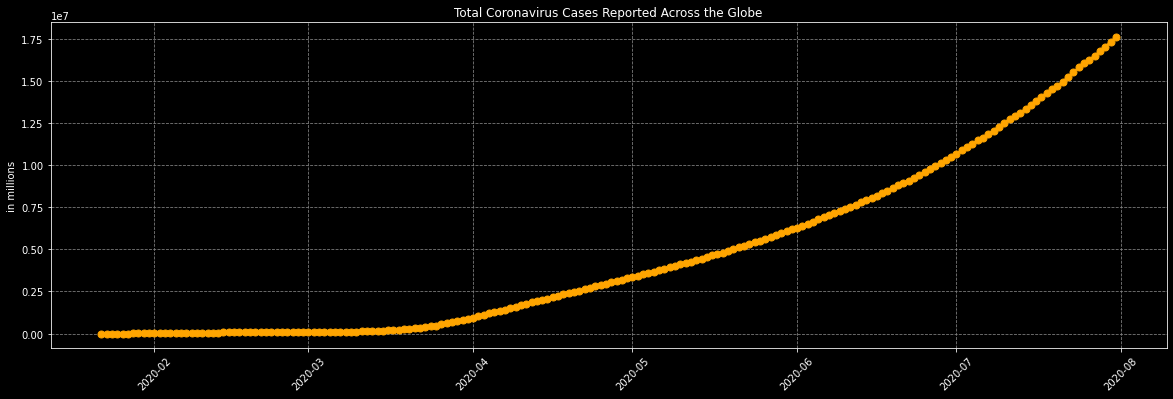

In [8]:

# Line plot for the total number of coronavirus confirmed cases reported across the world.
plt.style.use('dark_background')
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported Across the Globe')
plt.plot(global_cases.index, global_cases, c='orange', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.ylabel('in millions')
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

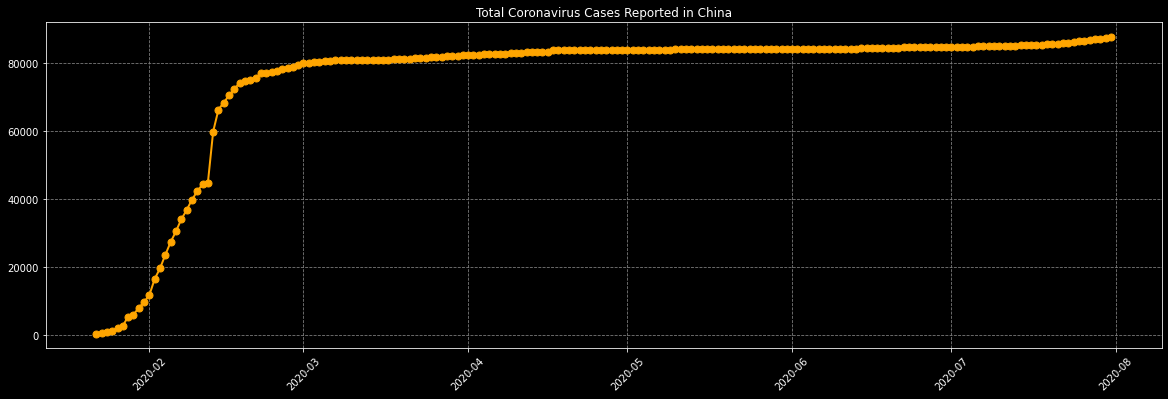

In [9]:

# Line plot for the total number of coronavirus confirmed cases reported in China only.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in China')
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

The curve flattens after 23 February 2020 because Wuhan (the capital of Hubei province in China) was put under total lockdown on 23 January 2020. As a result, the spread of the virus slowed down significantly.

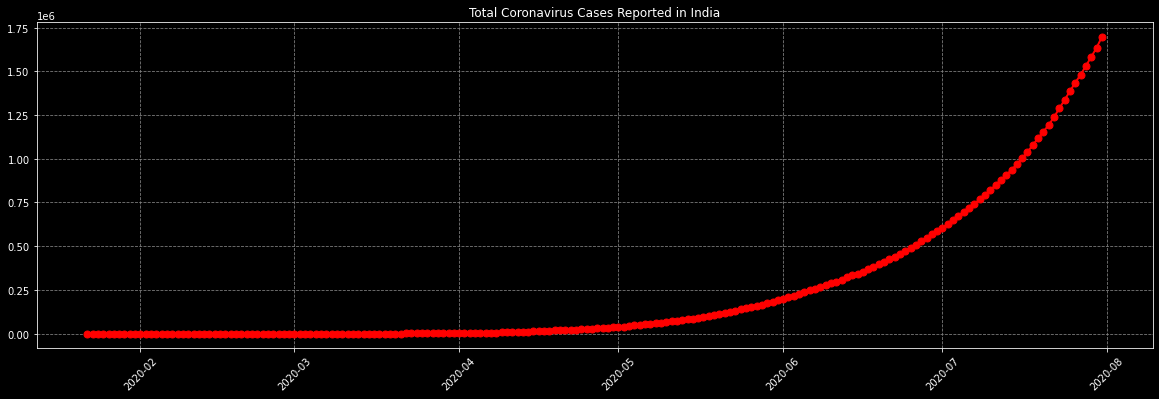

In [10]:

# Line plot for the total number of coronavirus confirmed cases reported in India.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in India')
plt.plot(india_cases.index, india_cases, c='r', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

India started testing for coronavirus in bulk in the last week of March 2020.

If you want to look at the trend of the coronavirus outbreak in India across all the states, then click on the link provided below.

[Ministry Of Health & Family Welfare](https://www.mohfw.gov.in/)

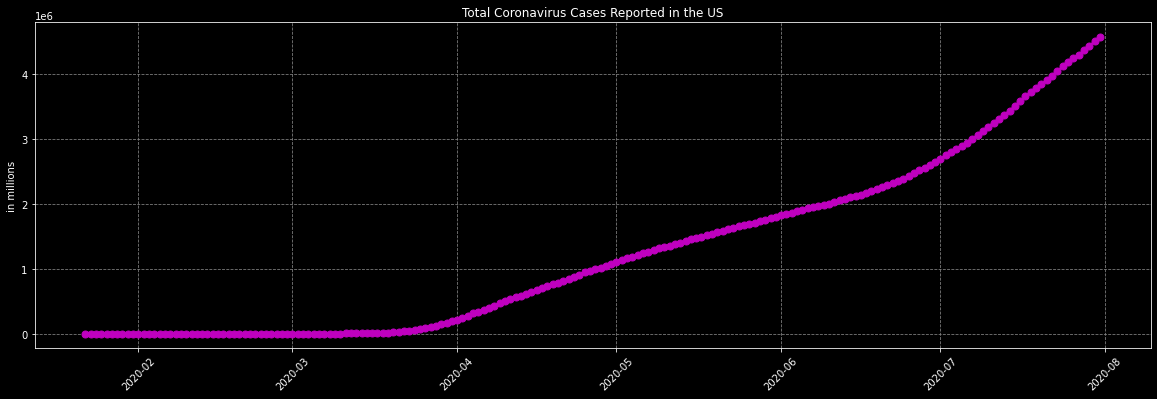

In [11]:

# Line plot for the total number of coronavirus confirmed cases reported in the US.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in the US')
plt.plot(us_cases.index, us_cases, c='m', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.ylabel("in millions")
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

The USA started testing for coronavirus in bulk after March 15, 2020.

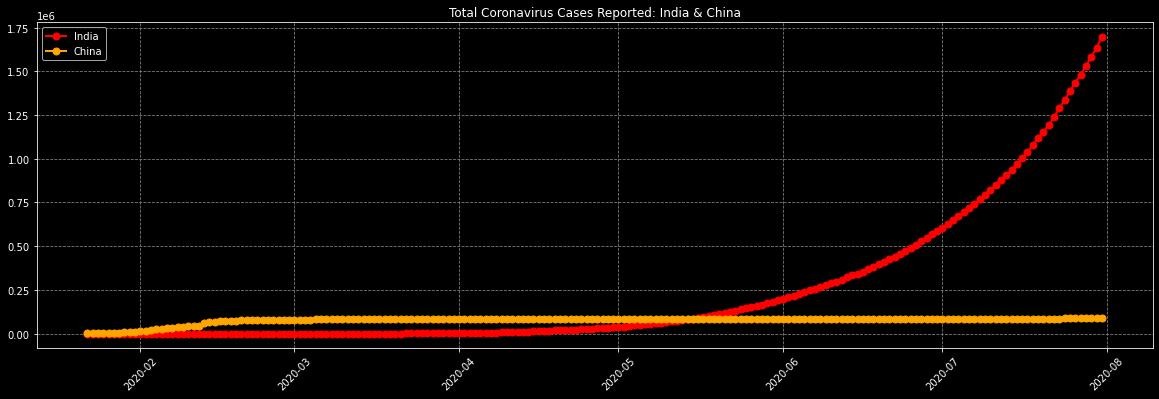

In [12]:

# Line plot to compare the total number of coronavirus confirmed cases reported in India and China.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported: India & China')
plt.plot(india_cases.index, india_cases, c='red', linewidth=2, marker='o', markersize=7, label='India')
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o', markersize=7, label='China')
plt.xticks(rotation=45)
plt.grid(True, 'major', linestyle='--', c='grey')
plt.legend()
plt.show()

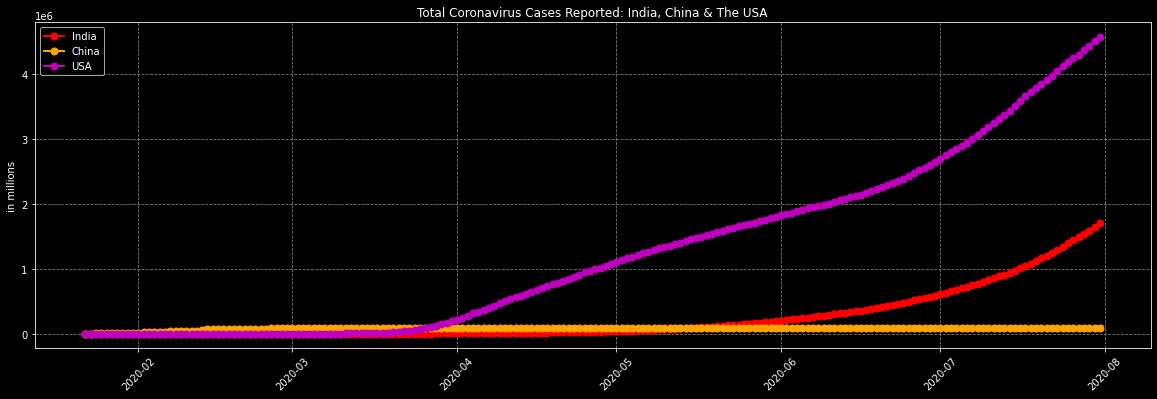

In [13]:

# Line plot to compare the total number of coronavirus confirmed cases reported in India, China & the USA.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported: India, China & The USA')
plt.plot(india_cases.index, india_cases, c='red', linewidth=2, marker='o', markersize=7, label='India')
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o', markersize=7, label='China')
plt.plot(us_cases.index, us_cases, c='m', linewidth=2, marker='o', markersize=7, label='USA')
plt.xticks(rotation=45)
plt.ylabel('in millions')
plt.grid(True, 'major', linestyle='--', c='grey')
plt.legend()
plt.show()

At the beginning of the last week of March, the total confirmed cases of coronavirus in the USA surpassed the same in China.

---

#### Activity 6: Grouping

Let's identify the top 5 countries having the most number of confirmed coronavirus cases and visualise their trends starting from March 15, 2020 because that's when the USA started testing in bulk. They have recorded the most number of coronavirus confirmed cases till date.

In [14]:

# The grouped DataFrame having the total coronavirus confirmed cases across the globe in descending order.
grouped_conf_df = conf_df.groupby(by='Country/Region', as_index=False).sum()
desc_grp_conf_df = grouped_conf_df.sort_values(by=conf_df.columns[-1], ascending=False)
desc_grp_conf_df.head()

Country/Region        Lat        Long  ...  7/29/20  7/30/20  7/31/20
174             US  40.000000 -100.000000  ...  4426982  4495015  4562038
23          Brazil -14.235000  -51.925300  ...  2552265  2610102  2662485
79           India  20.593684   78.962880  ...  1581963  1634746  1695988
140         Russia  61.524010  105.318756  ...   827509   832993   838461
156   South Africa -30.559500   22.937500  ...   471123   482169   493183

[5 rows x 195 columns]

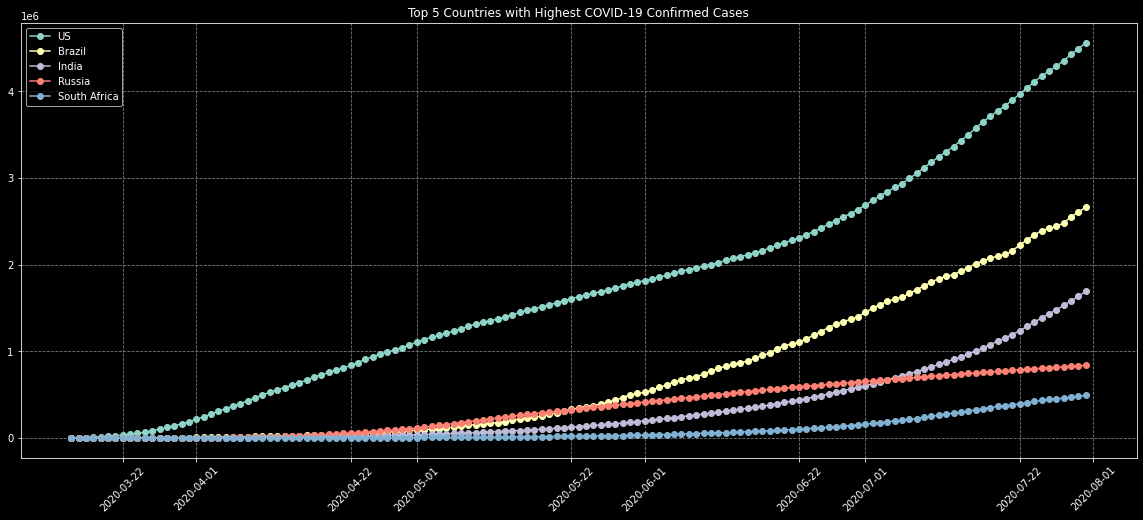

In [15]:

# Top 5 countries with the highest number of coronavirus confirmed cases starting from March 15, 2020.
plt.figure(figsize=(20, 8))
plt.title('Top 5 Countries with Highest COVID-19 Confirmed Cases')
for region in desc_grp_conf_df.head()['Country/Region']:
    plt.plot(global_cases.index[53:], desc_grp_conf_df[desc_grp_conf_df['Country/Region'] == region].iloc[0, 56:], '-o', label=region)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

---

#### Activity 7: Bivariate Bar Plots

Let's create a bar chart displaying the top 20 countries having the most number of coronavirus confirmed cases. 

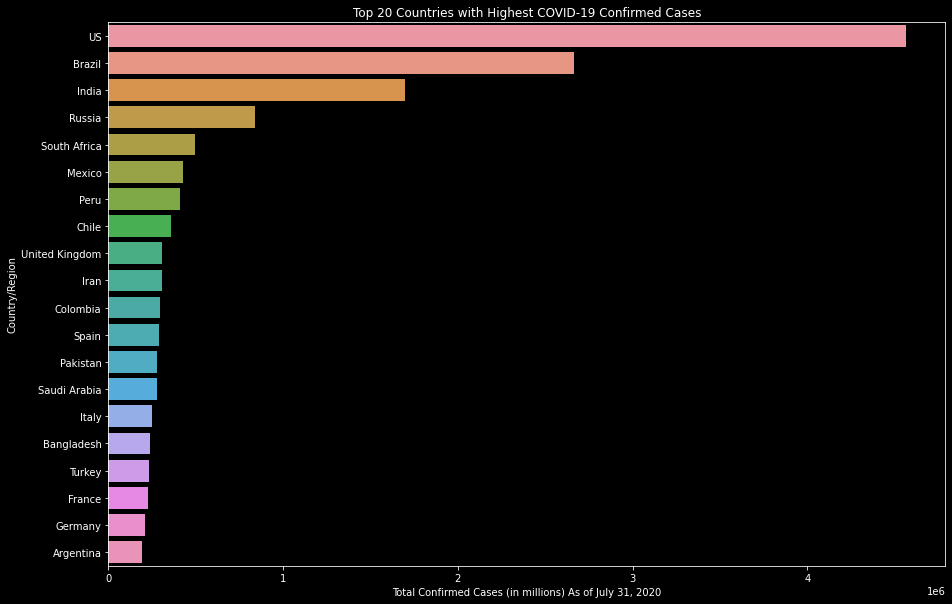

In [16]:

# Get the latest date.
last_col = conf_df.columns[-1]
# Modify the latest date in the 'Month DD, YYYY' format.
latest_date = datetime.datetime.strptime(last_col, '%m/%d/%y').strftime('%B %d, %Y')

# Create a bivariate bar chart displaying the top 20 countries having the most number of coronavirus confirmed cases.
plt.figure(figsize=(15, 10))
plt.title('Top 20 Countries with Highest COVID-19 Confirmed Cases')
sns.barplot(desc_grp_conf_df[last_col].head(20), desc_grp_conf_df['Country/Region'].head(20), orient='h')
plt.xlabel(f'Total Confirmed Cases (in millions) As of {latest_date}')
plt.show()

---

#### Activity 8: Cartograms (or Maps) For China^

Let's create a cartogram to show the distribution of confirmed coronavirus cases in China and mark the affected regions of China with location markers.

The markers will display the name of the region location along with the number of confirmed coronavirus cases in that region.

In [17]:

# The DataFrame for the total confirmed cases in China only.
conf_china_df = conf_df[conf_df['Country/Region'] == 'China']

# Map to show the distribution of confirmed coronavirus cases in China (regular markers).
china_map = folium.Map(location=[30.9756, 112.2707], width='100%', height='90%', tiles='Stamen Toner', zoom_start=4.25)
for i in conf_china_df.index:
  folium.Marker(location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i, 'Long']],
                popup= conf_china_df.loc[i, 'Province/State'] + "\n" + str(conf_china_df.loc[i, last_col])).add_to(china_map)
china_map

Let's create a cartogram to show the distribution of confirmed coronavirus cases in China and mark the affected regions of China with **circular** location markers.

The markers will display the name of the region location along with the number of confirmed coronavirus cases in that region.

In [18]:

# Map to show the distribution of confirmed coronavirus cases in China (circular markers).
china_map = folium.Map(location=[30.9756, 112.2707], width='100%', height='90%', tiles='Stamen Toner', zoom_start=4.5)
for i in conf_china_df.index:
  folium.Circle(radius=int(conf_china_df.loc[i, last_col]) * 2,
                location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i, 'Long']],
                popup= conf_china_df.loc[i, 'Province/State'] + "\n" + str(conf_china_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(china_map)
china_map

We know for sure that the Hubei region was affected the most in China; almost 50 times the second most affected region. Hence, the circles for the other regions are very small compared to the circle for the Hubei region.

Let's increase the scale of the radius of the circles to see the variation of people affected in other regions. Also, we will not create a circle for the Hubei region on the map. 

In [19]:

# Map to show the distribution of confirmed coronavirus cases in China excluding Wuhan (circular markers).
china_map = folium.Map(location=[30.9756, 112.2707], width='100%', height='100%', tiles='Stamen Toner', zoom_start=4.5)
for i in conf_china_df.sort_values(by=last_col, ascending=False).index[1:]:
  folium.Circle(radius=int(conf_china_df.loc[i, last_col]) * 100,
                location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i, 'Long']],
                popup= conf_china_df.loc[i, 'Province/State'] + "\n" + str(conf_china_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(china_map)
china_map

As you can see, the number of reported cases of coronavirus are comparable in regions other than Hubei.

---

#### Activity 9: Cartogram (or Maps) For World

Let's create a cartogram to show the distribution of confirmed coronavirus cases across the world and mark the affected regions in the world with **circular** location markers.

The markers will display the name of the region location along with the number of confirmed coronavirus cases in that region.

In [20]:

# Map to show the distribution of confirmed coronavirus cases across the world (circular markers).
world_map = folium.Map(location=[0, 0], width='100%', height='80%', tiles='Stamen Toner', zoom_start=2.25)
for i in conf_df.index:
  folium.Circle(location=[conf_df.loc[i, 'Lat'], conf_df.loc[i, 'Long']], 
                radius=int(conf_df.loc[i, last_col]), 
                popup=conf_df.loc[i, 'Country/Region'] + '\n' + str(conf_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(world_map)
world_map

---

#### Activity 10: Cartogram (or Maps) For The USA

Let's also create a cartogram specifically for the United States for America.

In [21]:

# Map to show the distribution of confirmed coronavirus cases across the USA (circular markers).
us_conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_conf_df = pd.read_csv(us_conf_csv)
us_conf_df = us_conf_df.dropna()

us_map = folium.Map(location=[39.381266, -97.922211], width='100%', height='80%', tiles='Stamen Toner', zoom_start=4)
for i in us_conf_df.index:
  folium.Circle(location=[us_conf_df.loc[i, 'Lat'], us_conf_df.loc[i, 'Long_']], 
                radius=int(us_conf_df.loc[i, last_col]), 
                popup=us_conf_df.loc[i, 'Province_State'] + '\n' + str(us_conf_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(us_map)
us_map

Most number of the confirmed cases are recorded in the eastern region in the USA. Also, New York is the most affected city in the USA.

---

#### Activity 11: Non-Cumulative Confirmed Cases^^^

Let's identify the countries having the lowest number of daily or non-cumulative coronavirus confirmed cases to further identify the countries that have flattened the curve.

Let's create a DataFrame to find out the non-cumulative confirmed coronavirus cases starting from January 22, 2020.

In [22]:

# First step to create the DataFrame for the non-cumulative confirmed coronavirus cases starting from January 22, 2020.
non_cum_conf_df = desc_grp_conf_df.iloc[:, :4]
non_cum_conf_df

Country/Region        Lat        Long  1/22/20
174                     US  40.000000 -100.000000        1
23                  Brazil -14.235000  -51.925300        0
79                   India  20.593684   78.962880        0
140                 Russia  61.524010  105.318756        0
156           South Africa -30.559500   22.937500        0
..                     ...        ...         ...      ...
50                Dominica  15.415000  -61.371000        0
142  Saint Kitts and Nevis  17.357822  -62.782998        0
75                Holy See  41.902900   12.453400        0
184         Western Sahara  24.215500  -12.885800        0
104             MS Zaandam   0.000000    0.000000        0

[188 rows x 4 columns]

In [23]:

# Final step to create the DataFrame for the non-cumulative confirmed coronavirus cases starting from January 22, 2020.
for i in range(len(desc_grp_conf_df.columns[3:]) - 1):
  series = desc_grp_conf_df[desc_grp_conf_df.columns[3 + (i + 1) ]] - desc_grp_conf_df[desc_grp_conf_df.columns[3 + i]]
  non_cum_conf_df[desc_grp_conf_df.columns[3 + (i + 1)]] = series 

non_cum_conf_df.head()

Country/Region        Lat        Long  ...  7/29/20  7/30/20  7/31/20
174             US  40.000000 -100.000000  ...    70776    68033    67023
23          Brazil -14.235000  -51.925300  ...    69074    57837    52383
79           India  20.593684   78.962880  ...    50294    52783    61242
140         Russia  61.524010  105.318756  ...     5449     5484     5468
156   South Africa -30.559500   22.937500  ...    11362    11046    11014

[5 rows x 195 columns]

Let's create plots for a few countries to visualise the trends for the non-cumulative confirmed cases.

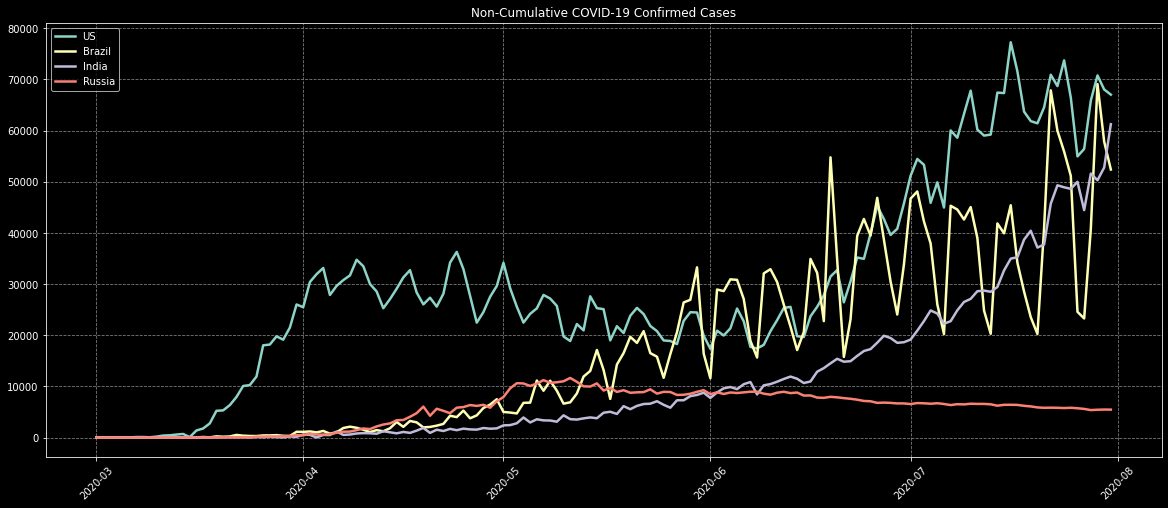

In [24]:

# Plot the first four countries having non-cumulative confirmed cases in the above DataFrame.
plt.figure(figsize=(20, 8))
plt.title('Non-Cumulative COVID-19 Confirmed Cases')
for region in non_cum_conf_df.iloc[:4, :]['Country/Region']:
  plt.plot(global_cases.index[39:], non_cum_conf_df[non_cum_conf_df['Country/Region'] == region].iloc[0, 42:], lw=2.5, label=region)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

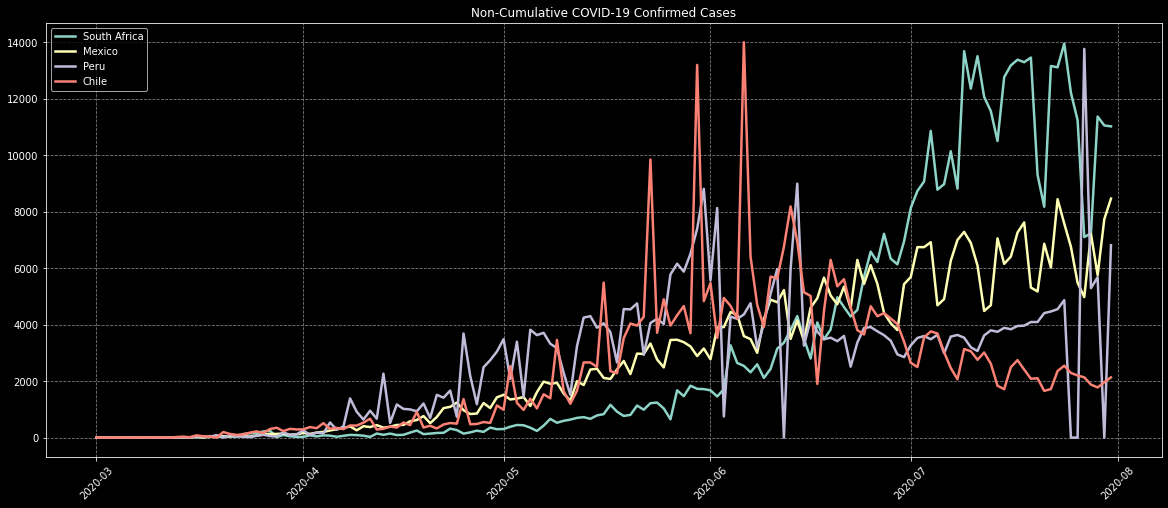

In [25]:

# Plot the next four countries having non-cumulative confirmed cases in the above DataFrame.
plt.figure(figsize=(20, 8))
plt.title('Non-Cumulative COVID-19 Confirmed Cases')
for region in non_cum_conf_df.iloc[4:8, :]['Country/Region']:
  plt.plot(global_cases.index[39:], non_cum_conf_df[non_cum_conf_df['Country/Region'] == region].iloc[0, 42:], lw=2.5, label=region)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

---

#### Activity 12: Flattened Curves^^

Let's create a list of countries that have flattened the curve. Ideally, to flatten the curve, the non-cumulative cases for each day should be 0. But in a practical sense, from the point-of-view of healthcare facilities in a country, let's assume that on an average a country can handle 100 COVID-19 cases every day.

So, to find the countries that have flattened the curve, let's calculate the sum of daily coronavirus confirmed cases for each country. If the sum of daily coronavirus confirmed cases for the last 14 days is at most 1400, then we can say that the country has flattened the curve. 

In [26]:

# List of countries that have flattened the curve.
countries = []
for i in non_cum_conf_df.index:
  last_14_days = []
  for j in range(14):
    last_14_days.append(non_cum_conf_df.loc[i, non_cum_conf_df.columns[-(j + 1)]])
  if sum(last_14_days) <= 1400:
    countries.append(non_cum_conf_df.loc[i, 'Country/Region'])
countries

['Ireland',
 'Cameroon',
 'Korea, South',
 'Denmark',
 'Sudan',
 'Norway',
 'Congo (Kinshasa)',
 'Malaysia',
 'Finland',
 'Haiti',
 'Tajikistan',
 'Gabon',
 'Guinea',
 'Luxembourg',
 'Mauritania',
 'Albania',
 'Croatia',
 'Djibouti',
 'Central African Republic',
 'Hungary',
 'Greece',
 'Malawi',
 'Maldives',
 'Nicaragua',
 'Thailand',
 'Somalia',
 'Congo (Brazzaville)',
 'Montenegro',
 'Sri Lanka',
 'Eswatini',
 'Cuba',
 'Mali',
 'Cabo Verde',
 'South Sudan',
 'Slovakia',
 'Slovenia',
 'Namibia',
 'Lithuania',
 'Estonia',
 'Rwanda',
 'Guinea-Bissau',
 'Iceland',
 'Mozambique',
 'Sierra Leone',
 'Benin',
 'Yemen',
 'Suriname',
 'New Zealand',
 'Tunisia',
 'Uruguay',
 'Latvia',
 'Jordan',
 'Liberia',
 'Georgia',
 'Uganda',
 'Angola',
 'Niger',
 'Cyprus',
 'Burkina Faso',
 'Togo',
 'Chad',
 'Andorra',
 'Jamaica',
 'Sao Tome and Principe',
 'Malta',
 'Botswana',
 'Syria',
 'Diamond Princess',
 'San Marino',
 'Lesotho',
 'Bahamas',
 'Vietnam',
 'Tanzania',
 'Gambia',
 'Taiwan*',
 'Guyana',


Let's create line plots to visualise the total confirmed cases for the first 10 countries in the above list.

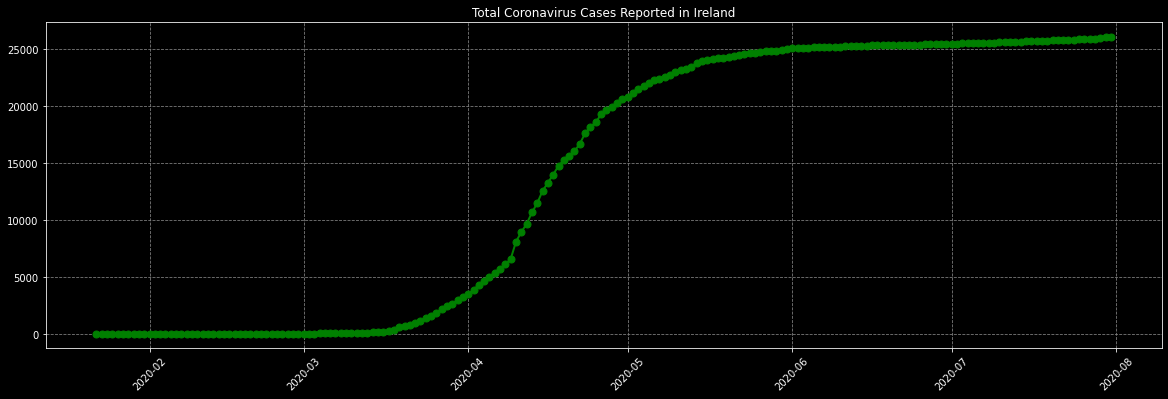

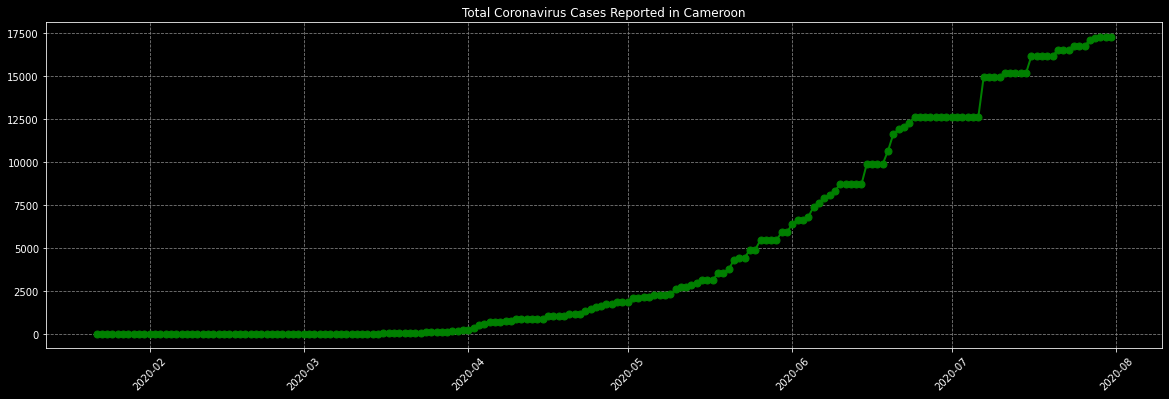

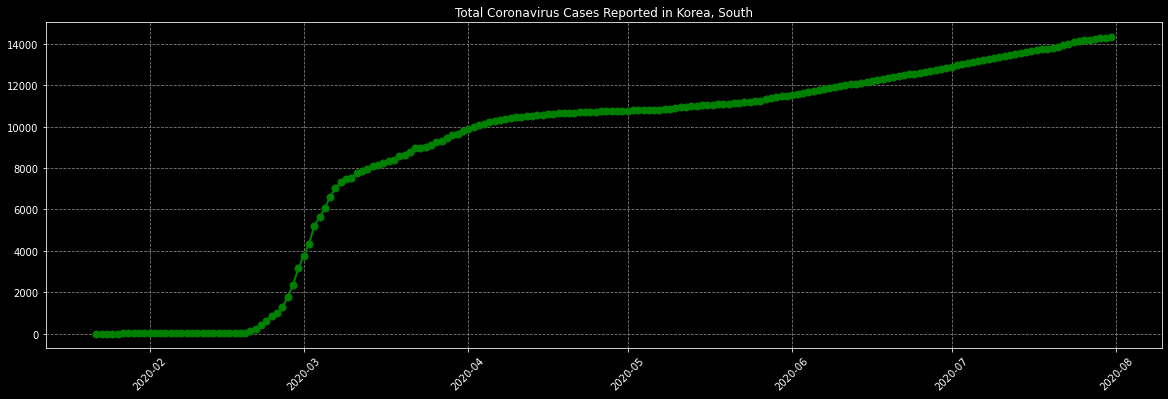

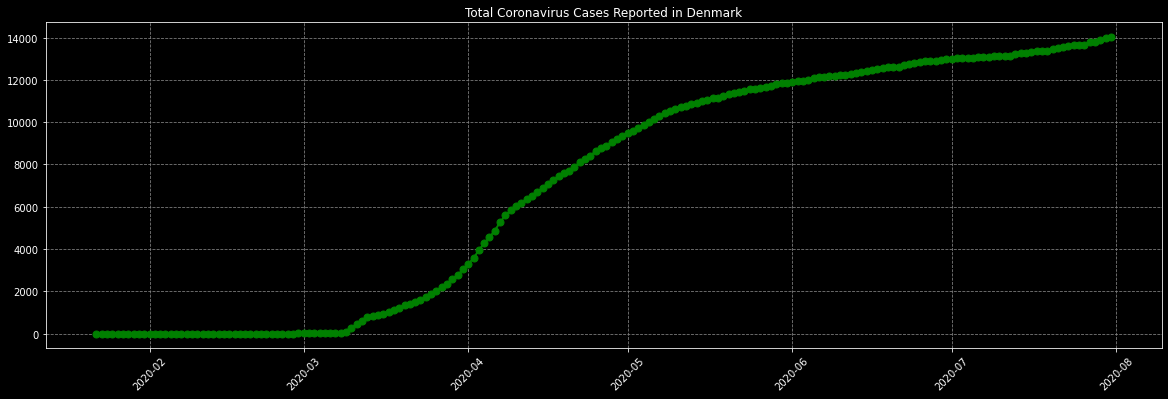

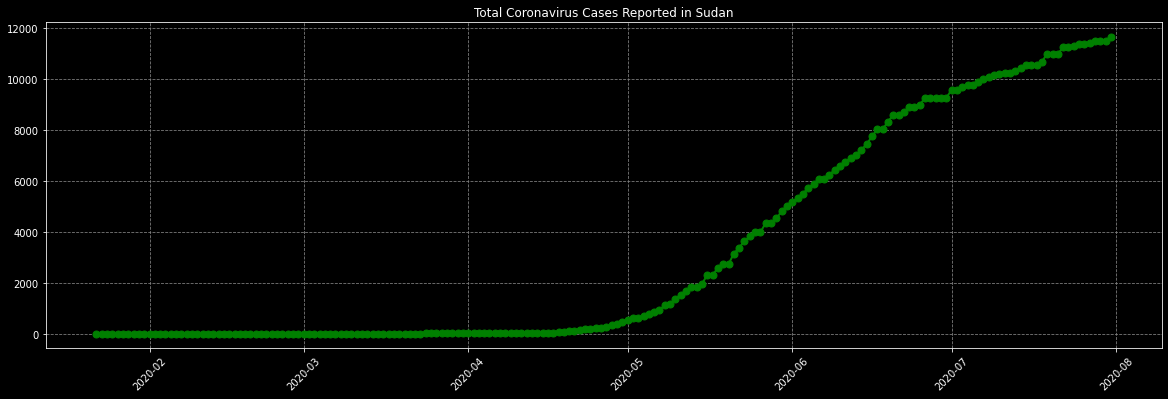

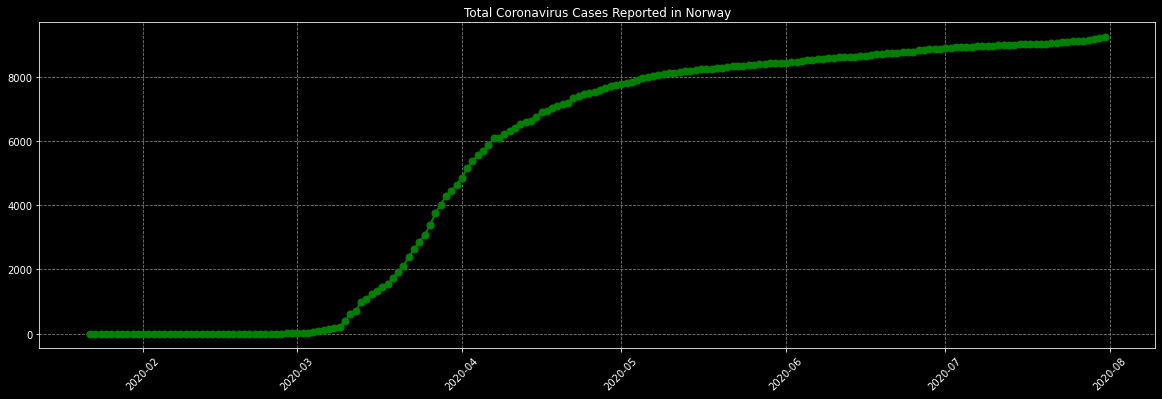

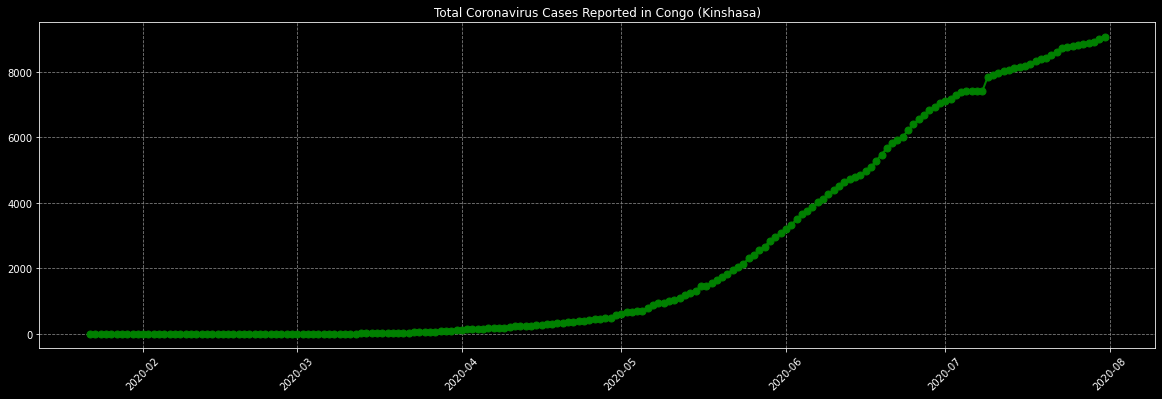

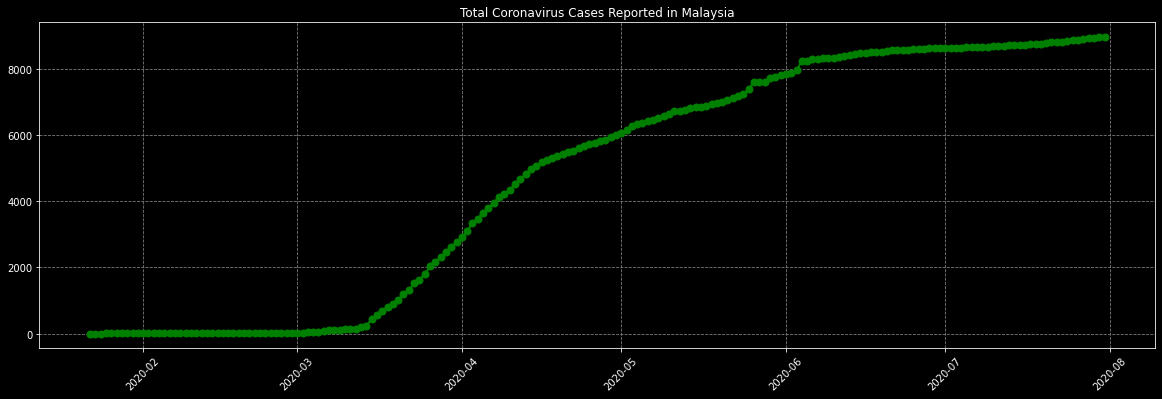

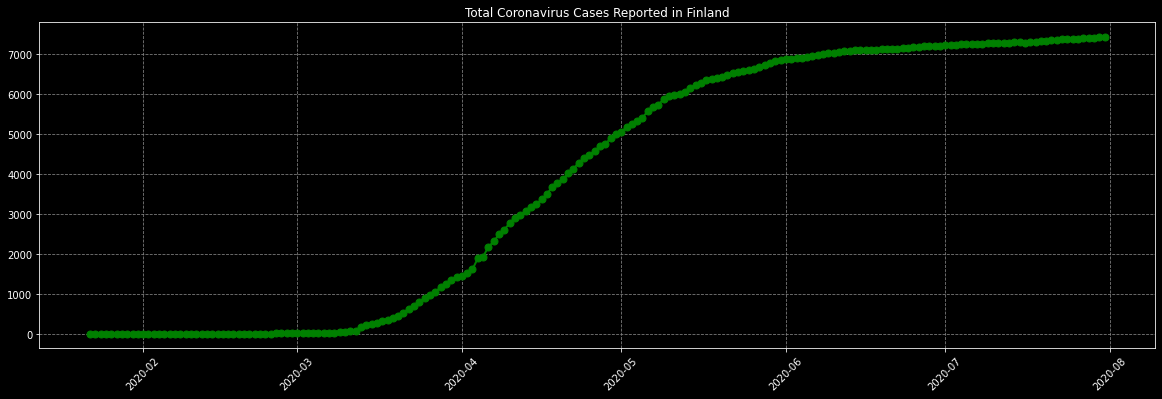

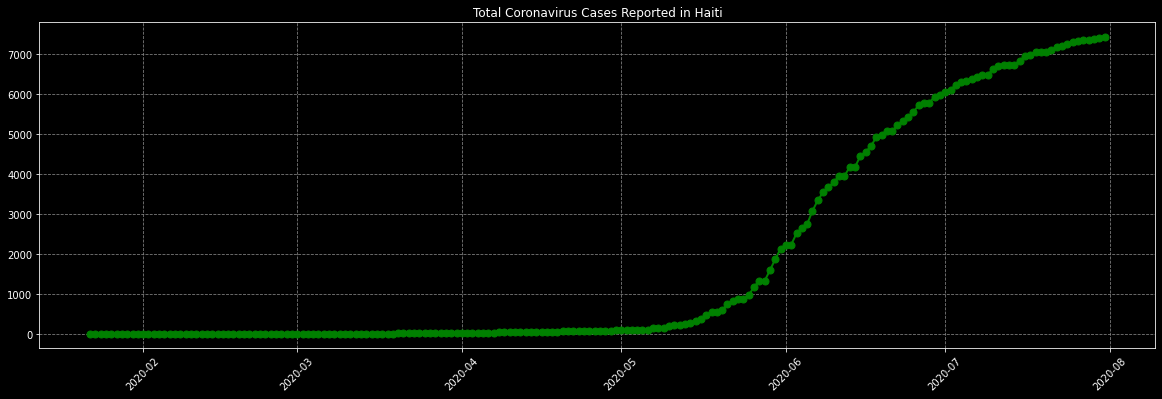

In [27]:

# Line plot for the total number of coronavirus confirmed cases reported in the countries that have flattened the curve.
def flattened_curve(country_list):
  for country in country_list: 
    country_cases = conf_df[conf_df['Country/Region'] == country].iloc[:, 4:].apply(sum, axis=0)
    country_cases.index = pd.to_datetime(country_cases.index)

    plt.figure(figsize=(20, 6))
    plt.title(f'Total Coronavirus Cases Reported in {country}')
    plt.plot(country_cases.index, country_cases, c='g', linewidth=2, marker='o', markersize=7)
    plt.xticks(rotation=45)
    plt.grid(True, 'major', linestyle='--', c='grey')
    plt.show()

flattened_curve(countries[:10])

We analysed only the confirmed cases. In the same way, you can analyse the deaths due to coronavirus data and number of people recovered from coronavirus data. The dataset structure for these two datasets is the same as that of the confirmed cases dataset.

In [28]:

# DataFrame for the total deaths due to coronavirus.
deaths_df = pd.read_csv(deaths_csv)
deaths_df.head()

Province/State Country/Region       Lat  ...  7/29/20  7/30/20  7/31/20
0            NaN    Afghanistan  33.93911  ...     1271     1271     1272
1            NaN        Albania  41.15330  ...      150      154      157
2            NaN        Algeria  28.03390  ...     1186     1200     1210
3            NaN        Andorra  42.50630  ...       52       52       52
4            NaN         Angola -11.20270  ...       48       51       52

[5 rows x 196 columns]

In [29]:

# DataFrame for the total number of patients recovered from coronavirus.
rec_df = pd.read_csv(rec_csv)
rec_df.head()

Province/State Country/Region       Lat  ...  7/29/20  7/30/20  7/31/20
0            NaN    Afghanistan  33.93911  ...    25389    25471    25509
1            NaN        Albania  41.15330  ...     2830     2883     2952
2            NaN        Algeria  28.03390  ...    19592    20082    20537
3            NaN        Andorra  42.50630  ...      804      806      807
4            NaN         Angola -11.20270  ...      301      395      437

[5 rows x 196 columns]

---
